In [27]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Load RAVDESS Dataset
paths = []
labels = []
label_map = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}
for dirname, _, filenames in os.walk('../RAVDESS_Audio_Speech_Actors_01-24'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('-')[2]
        label = label_map[label]
        labels.append(label.lower())
    if len(paths) == 2800:
        break

print(labels[:3])
print('Dataset is Loaded')

['neutral', 'neutral', 'neutral']
Dataset is Loaded


In [29]:
len(paths), len(labels)

(1440, 1440)

In [30]:
# Create a dataframe
ravdess = pd.DataFrame()
ravdess['speech'] = paths
ravdess['label'] = labels
ravdess.head()

,speech,label
0,../RAVDESS_Audio_Speech_Actors_01-24\Actor_01\...,neutral
1,../RAVDESS_Audio_Speech_Actors_01-24\Actor_01\...,neutral
2,../RAVDESS_Audio_Speech_Actors_01-24\Actor_01\...,neutral
3,../RAVDESS_Audio_Speech_Actors_01-24\Actor_01\...,neutral
4,../RAVDESS_Audio_Speech_Actors_01-24\Actor_01\...,calm


In [31]:
ravdess['label'].value_counts()

label
calm         192
happy        192
sad          192
angry        192
fearful      192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64

In [32]:
# Load TESS Dataset
paths = []
labels = []
for dirname, _, filenames in os.walk('../TESS data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

print(labels[:5])
print('Dataset is Loaded')

['angry', 'angry', 'angry', 'angry', 'angry']
Dataset is Loaded


In [33]:
len(paths)

2800

In [34]:
## Create a dataframe
tess = pd.DataFrame()
tess['speech'] = paths
tess['label'] = labels
tess.head()

,speech,label
0,../TESS data\OAF_angry\OAF_back_angry.wav,angry
1,../TESS data\OAF_angry\OAF_bar_angry.wav,angry
2,../TESS data\OAF_angry\OAF_base_angry.wav,angry
3,../TESS data\OAF_angry\OAF_bath_angry.wav,angry
4,../TESS data\OAF_angry\OAF_bean_angry.wav,angry


In [35]:
tess['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

In [36]:
# Mix both datasets
tess['label'] = tess['label'].replace('ps', 'surprised')
tess['label'] = tess['label'].replace('fear', 'fearful')

# delete calm label from ravdess
ravdess = ravdess[ravdess['label'] != 'calm']

# print the number of data of neutral in ravdess
print(ravdess['label'].value_counts())


label
happy        192
sad          192
angry        192
fearful      192
disgust      192
surprised    192
neutral       96
Name: count, dtype: int64


In [37]:
# Combine both datasets
df = pd.concat([ravdess, tess], axis=0, ignore_index=True)
df['label'].value_counts()

label
happy        592
sad          592
angry        592
fearful      592
disgust      592
surprised    592
neutral      496
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

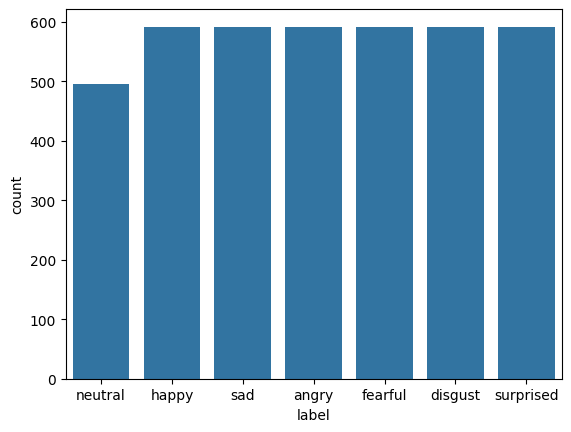

In [38]:
sns.countplot(data=df, x='label')

In [39]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

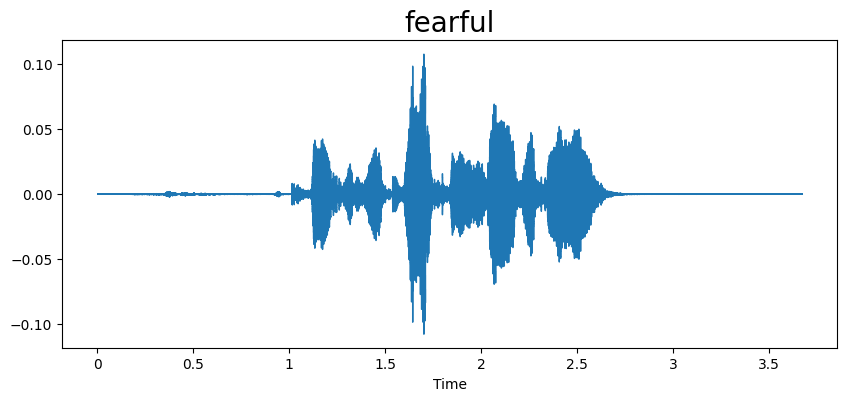

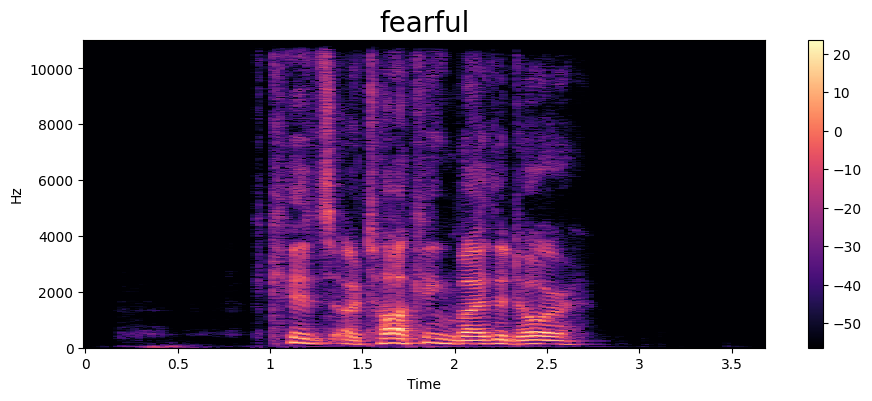

In [40]:
emotion = 'fearful'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [41]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [42]:
extract_mfcc(df['speech'][0])

array([-6.7019543e+02,  6.5063850e+01,  8.8895434e-01,  1.4715979e+01,
        9.1821651e+00,  6.6057485e-01, -3.8468359e+00, -3.5839462e+00,
       -1.2959006e+01, -3.3001330e+00,  9.1077960e-01, -3.5970356e+00,
        2.3762746e+00, -4.3889413e+00,  5.4508030e-01,  8.9185178e-01,
       -4.8025899e+00, -2.1054137e+00, -1.6059692e+00, -1.0523903e+00,
       -7.0672808e+00, -6.2306100e-01, -2.7280297e+00, -5.3073611e+00,
       -1.9691168e+00, -9.4615275e-01, -5.7211108e+00,  3.3299121e-01,
       -2.5438452e+00,  1.8220846e-01, -2.3510973e+00, -2.5047269e+00,
       -3.1515071e+00, -2.1908989e+00, -3.8017597e+00, -1.8130877e+00,
       -1.2612224e+00, -2.1449544e+00, -4.1521730e+00, -1.7796154e+00],
      dtype=float32)

In [43]:
print(df.shape)

(4048, 2)


In [44]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [45]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(4048, 40)

In [46]:
## input split
X.shape

(4048, 40)

In [47]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [48]:
y = y.toarray()

In [49]:
y.shape

(4048, 7)

In [50]:
enc.categories_

[array(['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad',
        'surprised'], dtype=object)]

In [51]:
# LSTM Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, Flatten

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Train the model
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])
# history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50


51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.3226 - loss: 1.6869 - val_accuracy: 0.5753 - val_loss: 1.1472
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5996 - loss: 1.0650 - val_accuracy: 0.6926 - val_loss: 0.8469
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6740 - loss: 0.8722 - val_accuracy: 0.6988 - val_loss: 0.7854
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6994 - loss: 0.8311 - val_accuracy: 0.6926 - val_loss: 0.8207
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7285 - loss: 0.7496 - val_accuracy: 0.6975 - val_loss: 0.7559
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7266 - loss: 0.7529 - val_accuracy: 0.7407 - val_loss: 0.7194
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7408 - loss: 0.7052 - val_accuracy: 0.7099 - val_loss: 0.7467
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.7529 - loss: 0.6735 - val_accuracy: 0.7432 - val_loss: 0.

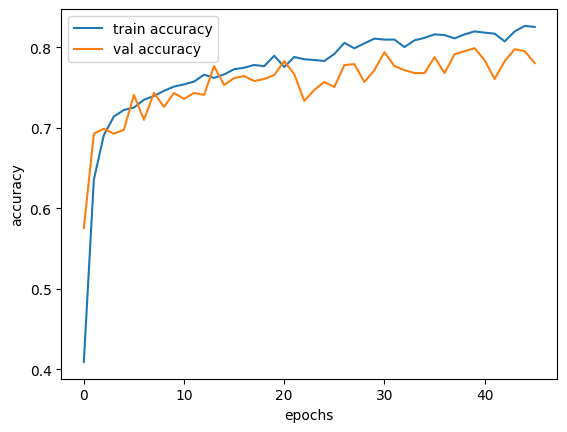

In [60]:
epochs = list(range(len(history.history['accuracy'])))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

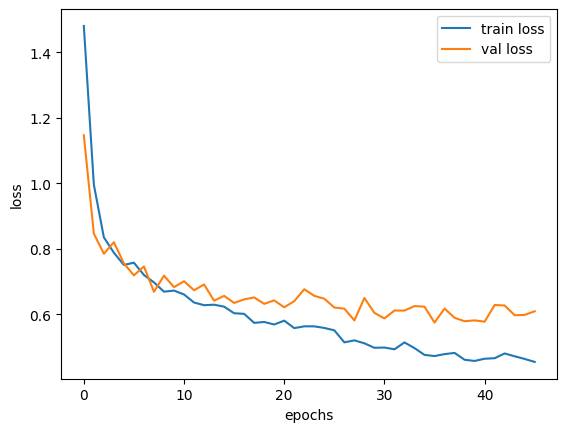

In [61]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [62]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

accuracy_score(y_true, y_pred), cm

 1/26 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


(0.7802469135802469,
 array([[ 97,   4,   6,   3,   0,   5,   8],
        [  3,  93,   1,   3,   0,  15,   2],
        [  3,   4,  84,   4,   4,  14,   2],
        [  1,   4,   9,  77,   1,  13,   9],
        [  0,   0,   0,   0,  73,   5,   2],
        [  2,   3,   7,   4,   4, 107,   4],
        [  0,  10,   4,   3,   3,   9, 101]], dtype=int64))

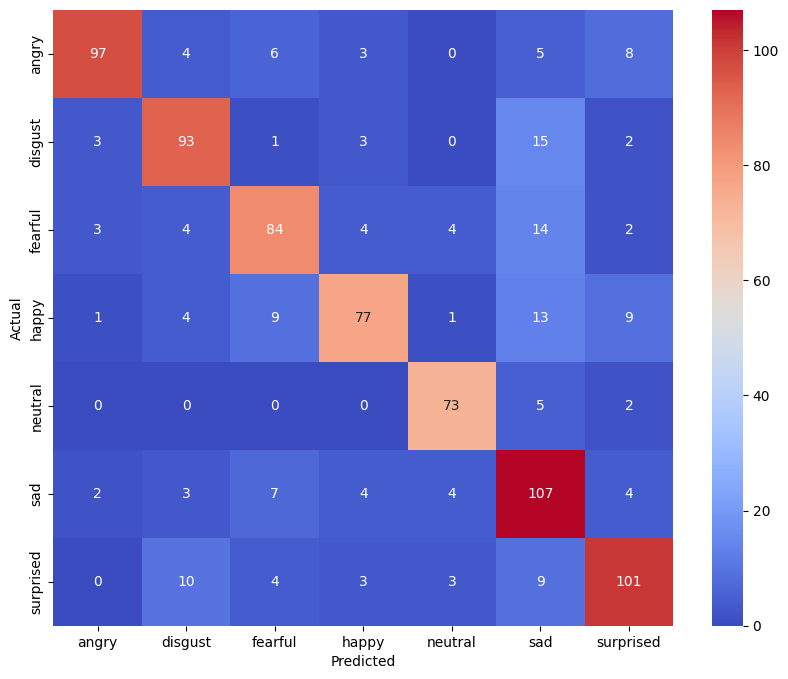

In [63]:
# print colorful confusion matrix
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=enc.categories_[0], yticklabels=enc.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [64]:
# #save model
# model.save('..\Models\emotion_detection_mixed_LSTM_1.keras')

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


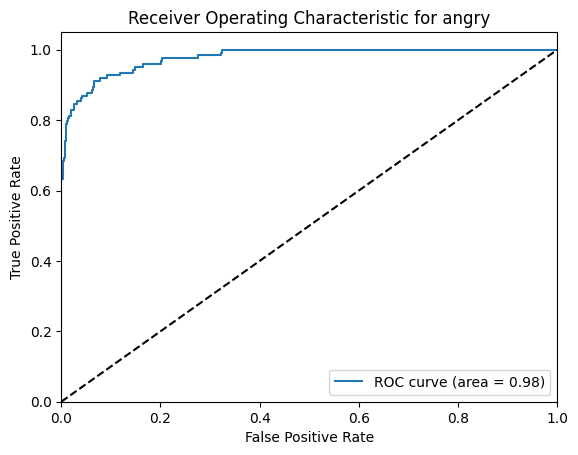

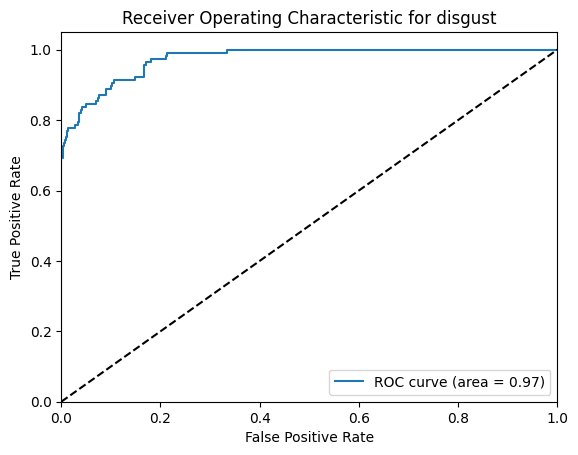

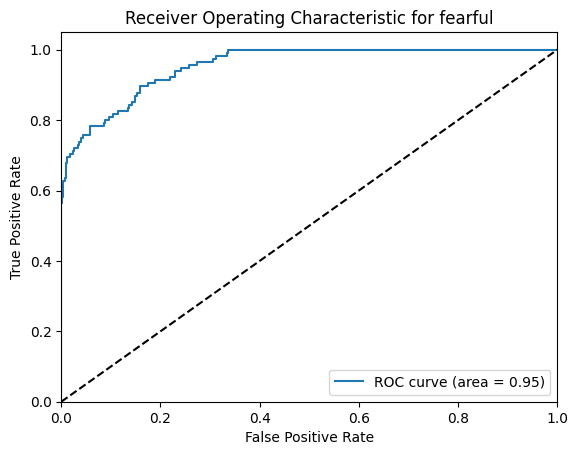

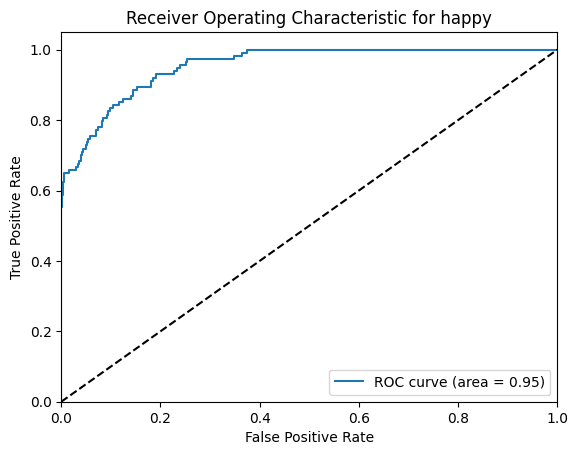

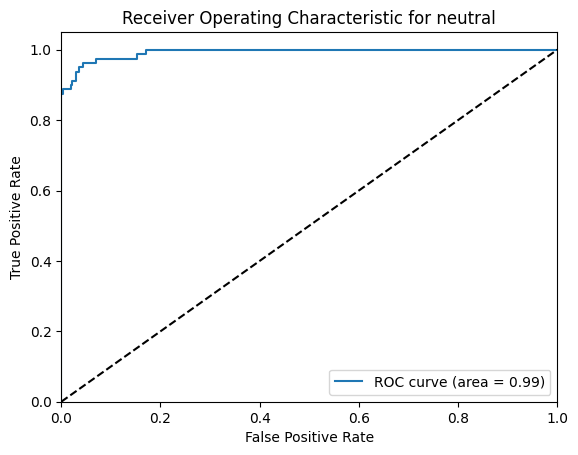

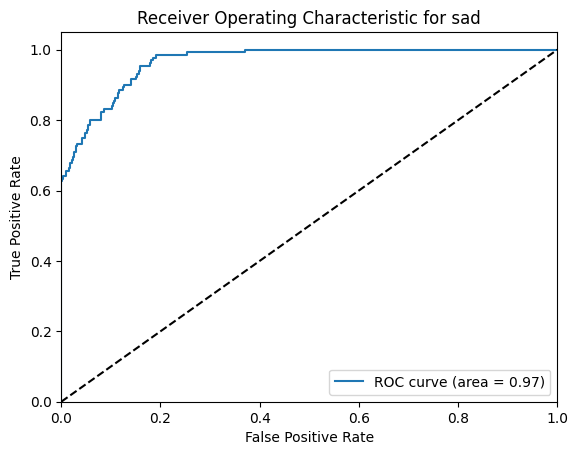

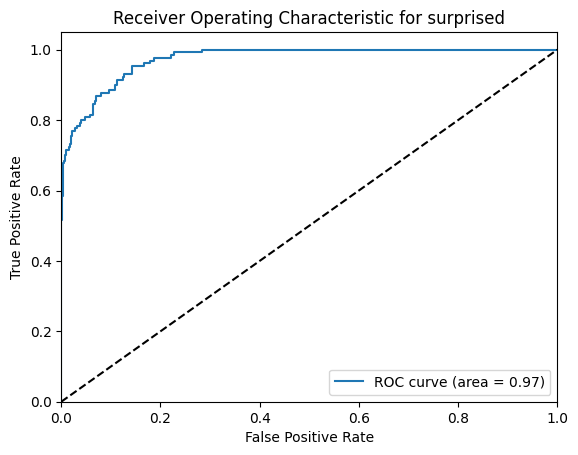

In [65]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

lb = LabelBinarizer()
y_test = lb.fit_transform(y_test)
y_pred = model.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(7):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for '+enc.categories_[0][i])
    plt.legend(loc="lower right")
    plt.show()